<a href="https://colab.research.google.com/github/nithasha2000/LGMVIP/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lets Grow More**

**Task 4**

Name : Nithasha Babu Raj

Data Science Internship

**Prediction using Decision Tree Algorithm**

 **Create the Decision Tree classifier and visualize it graphically.** The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

 Dataset: https://bit.ly/3kXTdox

**Importing Libraries**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [105]:
df1= pd.read_csv("Iris.csv")
df1.columns=['id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df1.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
df2=df1.copy()
df2.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [108]:
df2.shape

(150, 6)

In [109]:
df2.duplicated().sum()

0

In [110]:
df2 = df2.drop_duplicates()

In [111]:
df2.shape

(150, 6)

In [112]:
df2.corr()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


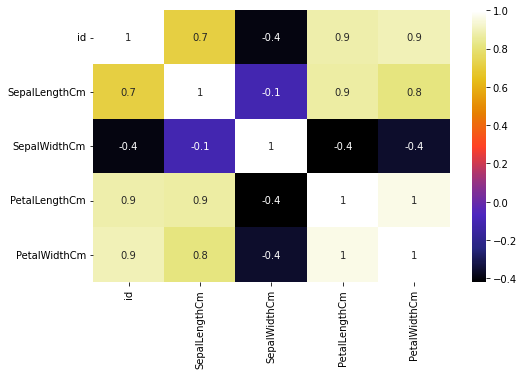

In [113]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),annot=True,cbar=True,cmap='CMRmap',fmt='0.1g')
plt.show()

In [114]:
print(df2.skew())

id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


In [116]:
df2['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [115]:
df2['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [117]:
df2.groupby(['Species']).count()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


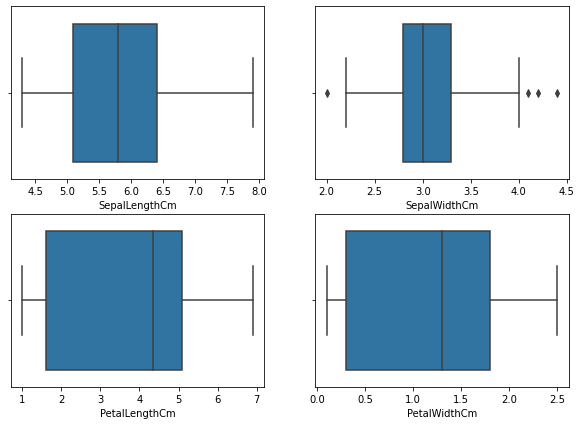

In [118]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(x=df2.SepalLengthCm)
plt.subplot(2,2,2)
sns.boxplot(x=df2.SepalWidthCm)
plt.subplot(2,2,3)
sns.boxplot(x=df2.PetalLengthCm)
plt.subplot(2,2,4)
sns.boxplot(x=df2.PetalWidthCm)
plt.show()

In [119]:
a=df2.shape[0]
df2=df2[df2['SepalWidthCm']<4]

In [120]:
print(df2.shape)

(146, 6)


In [121]:
df1.shape

(150, 6)

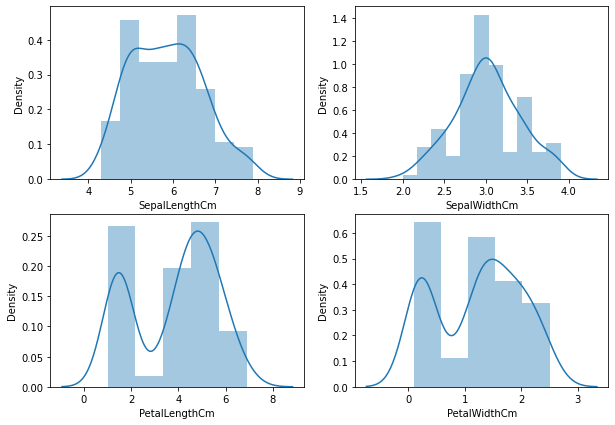

In [122]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df2.SepalLengthCm)
plt.subplot(2,2,2)
sns.distplot(df2.SepalWidthCm)
plt.subplot(2,2,3)
sns.distplot(df2.PetalLengthCm)
plt.subplot(2,2,4)
sns.distplot(df2.PetalWidthCm)
plt.show()

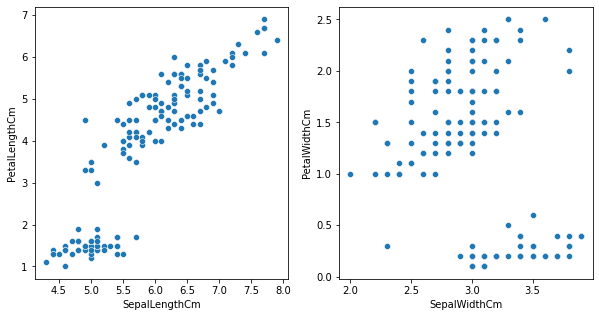

In [124]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(df2.SepalLengthCm,df2.PetalLengthCm)
plt.subplot(1,2,2)
sns.scatterplot(df2.SepalWidthCm,df2.PetalWidthCm)
plt.show()

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
df3=df2['Species']
df3 = pd.DataFrame(df3)
df3['Spcies_encoded']=LabelEncoder().fit_transform(df3[['Species']])
print(df3.value_counts())
df3 = df3.drop(['Species'],axis=1)
df3.sample(5)

Species          Spcies_encoded
Iris-virginica   2                 50
Iris-versicolor  1                 50
Iris-setosa      0                 46
dtype: int64


,Spcies_encoded
137,2
111,2
139,2
65,1
97,1


In [127]:
x = df2.drop(['Species'],axis=1)
y = df3

In [128]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
print('xtrain:',x_train.shape)
print('xtest:',x_test.shape[0])
print('ytrain:',y_train.shape)
print('ytest:',y_test.shape[0])

xtrain: (102, 5)
xtest: 44
ytrain: (102, 1)
ytest: 44


In [129]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)

In [133]:
predict = model.predict(x_test)
accuracy_score(y_test,predict)


1.0

In [134]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        14

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



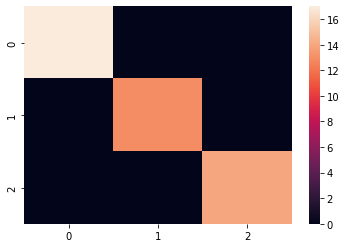

In [135]:
sns.heatmap(confusion_matrix(y_test,predict))

In [136]:
print('accuracy:',accuracy_score(y_test,predict)*100)

accuracy: 100.0


In [137]:
from sklearn import tree

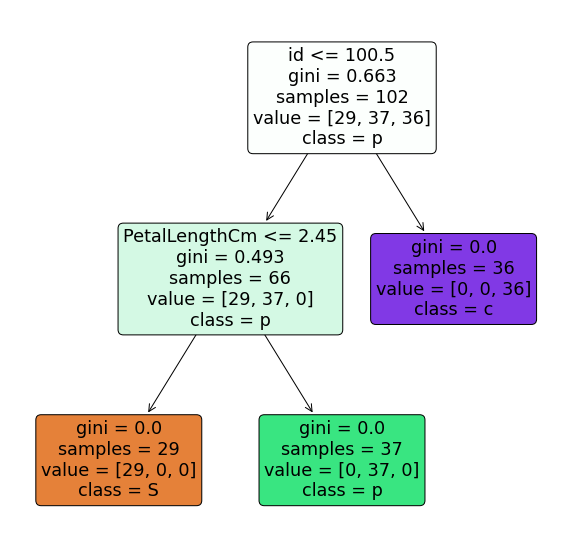

In [140]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=df2.columns[:-1],class_names=df3.columns[0],rounded=True,filled=True)
plt.show()


In [141]:
id=input("id:")
sepal_length = input("sepal_length:")
sepal_width = input("sepal_width:")
petal_length = input("petal_length:")
petal_width = input("petal_width:")

data = [[id,sepal_length,sepal_width,petal_length,petal_width]]

def infer(data):
    predicted = model.predict(data)[0]
    if predicted == 0:
        print("Iris-setosa")
    if predicted == 1:
        print("Iris-versicolor")
    if predicted == 2:
        print("Iris-virginica")
        
print("\npredicted Species:")
infer(data)

id:2
sepal_length:4.9
sepal_width:3.0
petal_length:1.5
petal_width:0.5

predicted Species:
Iris-setosa
